---

<h1><center>SDSE Lab 3 <br><br> K-means clustering </center></h1>

---

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

# 1) Load the data
Use `pickle.load` to load `data2d.pickle`. This file contains a single matrix called `X`. Use variables `N` and `D` for the number of rows (samples) and columns (features) respectively.

In [15]:
with open('data2d.pickle','rb') as file:
    X = pickle.load(file)
    
N, D = np.shape(X)

print(X)

[[ -1.85978534  -4.40482484]
 [ -5.41758393  -0.88382921]
 [ -5.02740031   4.79357145]
 [ -4.84057167  -1.03673624]
 [ -2.97873759   6.25945809]
 [ -6.83622735  -0.78426219]
 [ -7.11191649   8.11941977]
 [ -1.71960342   4.06415746]
 [ -2.03011292  -4.07247555]
 [ -6.63290986   5.80354133]
 [ -5.8960572   -3.1838544 ]
 [ -2.99852944   4.5280271 ]
 [ -9.76968752   7.61756396]
 [ -6.22734742  -1.22036737]
 [ -2.78236591  -1.23662457]
 [ -1.19077442  -4.17694009]
 [ -2.93781337   6.0601591 ]
 [ -8.92932721   9.19441228]
 [ -8.63132965   0.3561708 ]
 [ -0.3566098   -3.47836678]
 [ -9.39867164   7.58387579]
 [ -1.78744381  -2.43469831]
 [ -6.15245181  -1.45897667]
 [-10.0719509    7.05520883]
 [ -9.17495858   7.2341242 ]
 [ -9.13603292   0.11856472]
 [ -3.78746659   4.7888409 ]
 [ -6.34257339  -1.56679699]
 [ -9.08481601   7.06827728]
 [ -3.2603011    4.00308538]
 [ -2.61901088   4.63787521]
 [ -6.59012291  -2.52170334]
 [ -8.99831426   7.20539486]
 [ -6.08821437   4.70470828]
 [ -0.48967898

In [16]:
result['N'] = N
result['D'] = D 

# 2) Scatter plot
Create a scatter plot with the first column along the x-axis and the second column along the y-axis. Use `plt.axis('equal')` to force the two axes to have the same scale. This is important for correct visualization of the Euclidean distances between points. Save your figure handle to `fig2`.

(-11.849664686869328,
 1.873188199333136,
 -6.398006044898596,
 10.829062019026559)

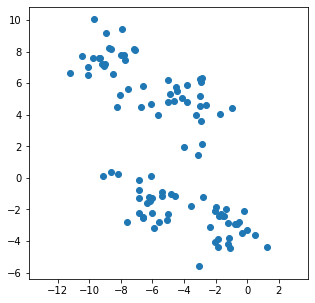

In [17]:
fig2 = plt.figure(figsize=(5,5))
x = X[:, 0]
y = X[:, 1]
plt.scatter(x,y)
plt.axis('equal')

In [21]:
result['fig2'] = fig2

# 3) Initialize centroids
Complete the function below that takes the number of centroids `K` and the data matrix `X` and returns `K` randomly placed centroids. The centroids should be selected according to a uniform distribution that spans a box fitted to the data. The return value should be a numpy array with shape `(K,D)` where `D` is the number of columns in X. Make sure this function  works for for values of `D` other than 2.

In [22]:
def initialize_centroids(K,X):
    # Get the number of dimensions (columns) in X
    D = X.shape[1]

    # Find the minimum and maximum values of each dimension in X
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)

    # Initialize the centroids randomly within the range of the data using a uniform distribution
    centroids = np.random.uniform(low=min_vals, high=max_vals, size=(K, D))

    return centroids

In [23]:
result['C3'] = initialize_centroids(3,X)

# 4) Compute the assignment for given centroids
Complete the function below that takes the data matrix and centroid locations, and returns an assignment matrix `gamma`. `gamma` should be a numpy array with shape `(N,K)`. Each row of `gamma` should contain `K-1` `False` values and one `True` value in the position corresponding to the centroid that is nearest to that data point (Euclidean distance). Hint: `np.argmin`.

In [24]:
def assign_samples_to_nearest_centroid(X,C):
    N = X.shape[0]
    K = C.shape[0]
    gamma = np.zeros((N,K),dtype=bool)
    #print(X[:, np.newaxis, :] - C)
    
    # Euclidian distance of points
    distances = np.linalg.norm(X[:, np.newaxis, :] - C, axis=2) # np.newaxis adds a new dimension to the array, finds norm of (points - centroid coords)

    # Find the index of the nearest centroid for each data point
    nearest_centroid = np.argmin(distances, axis=1)

    # Set the corresponding element of gamma to True for each nearest centroid
    gamma[np.arange(N), nearest_centroid] = True

    return gamma

In [25]:
result['gamma4'] = assign_samples_to_nearest_centroid(X,result['C3'])

# 5) Plot data, centroids, assignment
Complete the function below that takes the data matrix, a set of centroids, and an assignment matrix and creates a scatter plot similar to the one shown here. The centroids should be indicated with a large dot, and the data samples should be color-coded according to their cluster membership. Your plot may not look identical to this one due to the random placement of the centroids.

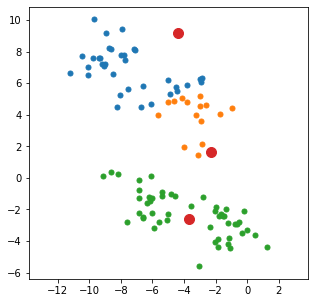

In [26]:
def plot_scatter(X, C, gamma):
    K = gamma.shape[1]
    fig = plt.figure(figsize=(5,5))

    # Plot data points
    colors = plt.cm.rainbow(np.linspace(0, 1, K)) # plt.cm.rainbow color-codes the dots
    for k in range(K):
        plt.scatter(X[gamma[:,k],0], X[gamma[:,k],1], color=colors[k])
    
    # Plot centroids
    plt.scatter(C[:,0], C[:,1], s=200, marker='*', color='black')
    
    plt.show()
    return fig

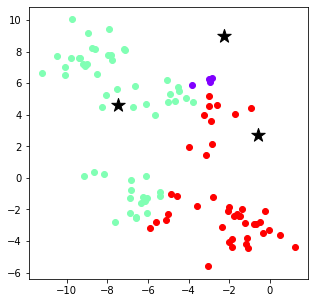

In [27]:
result['fig5'] = plot_scatter(X, result['C3'], result['gamma4'])

---

# An aside on boolean indexing

Boolean indexing is a useful way of selecting a sub-array from a larger array according to some condition. 

For example, suppose we have an array `A` of length 4, consisting of the integers from 0 to 3. 

In [28]:
A = np.arange(4)

Here is how you can extract the zeroth and 2nd elements of `A` using boolean indexing:

In [29]:
A[[True,False,True,False]]

array([0, 2])

That is, you pass the boolean array `[True,False,True,False]` as a `selector` to `A[selector]`. This technique is useful when the boolean selector is created with a condition on the values of `A`. For example, if you wanted to extract all the values that are greater than 1.4:

In [30]:
selector = A>1.4
A[selector]

array([2, 3])

or simply:

In [31]:
A[A>1.4]

array([2, 3])

**Optional challenge:**
    
Define `A` as an array of integers from 0 to 9.
1. Find the sum of elements of A that are even numbers.
2. Find the sum of elements of A that are greater than seven.

In [32]:
A = np.arange(10)
print(A)
even = sum([i for i in A if i % 2 == 0])
gr7 = sum(A[A>7])
print("Sum of even elements in A:", even)
print("Sum of numbers in A that are greater than 7:", gr7)

[0 1 2 3 4 5 6 7 8 9]
Sum of even elements in A: 20
Sum of numbers in A that are greater than 7: 17


---

# 6) Compute the centroids for a given assignment
Complete the function below that takes the assignment and the data matrix and returns centroids placed at the mean of each cluster. The return value should be a numpy array with shape `(K,D)`. 

In [33]:
def place_centroids(gamma, X):
    K = gamma.shape[1]
    D = X.shape[1]
    C = np.empty((K,D))
    #print(gamma)
    for i in range(K):
        # Compute the mean of the data points assigned to cluster k for each column of gamma
        gamma_columns = gamma[:,i]
        points = X[gamma_columns] #returns values in X that are true for each gamma_column
        cluster_mean = np.mean(points, axis=0) # finds mean for X values for any true value of gamma column
        
        # Assign the cluster mean to centroid k
        C[i] = cluster_mean
    
    return C

In [34]:
result['C6'] = place_centroids(result['gamma4'], X)

# 7) Code K-means
Now we will implement the K-means algorithm using the methods that we've already coded. Replace each of the ellipses below with the appropriate code. 

In [35]:
def run_kmeans(X,C):
    done = False
    
    while not done:
        
        # compute assignment (E step)
        gamma = assign_samples_to_nearest_centroid(X, C)
        
        # place centroids (M step)
        C_new = place_centroids(gamma, X)
        
        # Break if any of the clusters are empty
        if np.any(np.isnan(C_new)):
            C = None
            gamma = None
            break

        # Break if there is no change in the assignment
        if np.allclose(C, C_new): # returns True if elements of a and b in np.allclose(a,b) are close within a specified tolerance
            done = True
        else:
            C = C_new

    return C, gamma

# Test your code

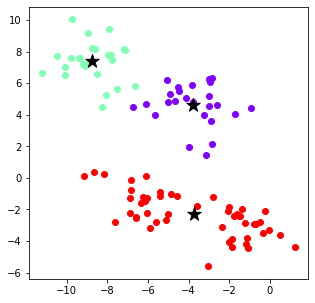

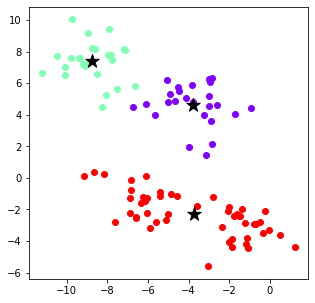

In [36]:
R = run_kmeans(X,result['C3'])
plot_scatter(X, R[0], R[1])

In [37]:
result['kmeans7'] = run_kmeans(X,result['C3'])

# 8) Evaluate the cost function 
Complete the function below that evaluates the cost function (total inertia) for a given data matrix, centroid placement, and assignment matrix. The result is a scalar value.

$
J = \sum_{i=1}^{N} \sum_{k=1}^{K} \gamma_{i,k}( x_i - \mu_k )^2 
$

In [38]:
def eval_cost(X,C,gamma):
    K = gamma.shape[1]
    cost = 0
    
    for k in range(K):
        Xk = X - C[k] #difference of (points - centroid coords) 
        #print(Xk)
        cost = cost + np.sum(gamma[:,k] * np.linalg.norm(Xk, axis=1)**2) #multiplies True values of gamma columns with the difference (norm)
    
    #print(cost)
    return cost

In [39]:
result['cost8'] = eval_cost(X,result['C3'],result['gamma4'])

# 9) Ensemble run
Complete the function below that runs kmeans `ensemblesize` times, each with a different initial centroid placement. These initial placements should be chosen with `initialize_centroids(K,X)`. The function should return the single run with the lowest cost. Results should be returned in a **dictionary** with keys `('C','gamma','cost')`. `C` are the best centroids, `gamma` is t|he best assignment, and `cost` is the corresponding cost.

In [41]:
def ensemble_run(K,X,ensemblesize):
    best_run = {'C':None,'gamma':None,'cost':np.inf}
    for e in range(ensemblesize):
        
        # This part chooses random initial centroids until a valid setting is found (one with no empty clusters)
        done = False
        while not done:
            C = initialize_centroids(K,X)
            C, gamma = run_kmeans(X,C)
            done = C is not None

        cost = eval_cost(X,C,gamma)
       
        # Keep track of the best run
        if cost < best_run['cost']:
            best_run['C'] = C
            best_run['gamma'] = gamma
            best_run['cost'] = cost
               
    return best_run

In [42]:
result['ens9'] = ensemble_run(3,X,100)

C:\Users\brian\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\brian\anaconda3\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


# 10) Iteration over K
Complete the function below that takes the data matrix, a sample size, and a maximum number of clusters to consider (`maxK`).  The function should run `ensemble_run` for all values of `K` from 1 to `maxK`. It should return a numpy array of length `maxK-1` with the best case cost for each value of `K`.

In [43]:
def K_iteration(X, ensemblesize, maxK=10):
    allK = list(range(1,maxK))
    best_cost = np.empty(len(allK))
    
    for i, K in enumerate(allK): #runs i (position of element in allK(0-8), and value of element in allK(1-9))
        
        best_run = ensemble_run(K, X, ensemblesize)
        
        best_cost[i] = best_run['cost']
        
    return best_cost

# 11) Selecting K

We now run `K_iteration` with `ensemblesize=200`, `maxK=10` and plot the result. The plot shows the percent improvement of each `K` over `K-1`. From this plot, choose an ideal value for `K` and report it in the results dictionary as `Kideal`.

Text(0, 0.5, 'Percentage Improvement')

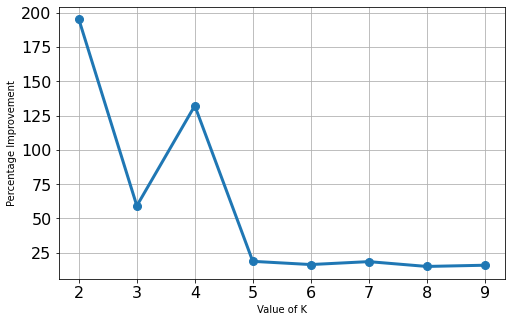

In [44]:
ensemblesize = 200
maxK=10
best_cost = K_iteration(X, ensemblesize, maxK)

fig11 = plt.figure(figsize=(8,5))
allK = list(range(1,maxK)) # x is allK
percent_improvement = 100*np.abs(np.diff(best_cost)) / best_cost[1:] # y = percent improvement
plt.plot(allK[1:],percent_improvement,
         linewidth=3,
         marker='o',
         markersize=8)
plt.grid()
plt.xticks(fontsize=16)
plt.xlabel('Value of K')
plt.yticks(fontsize=16)
plt.ylabel('Percentage Improvement')

In [58]:
#Kideal VALUE.

Kideal = 4